In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics as mt

# College Salary Analysis

Analysis By: Asha Sheikh

Data Source: https://www.kaggle.com/wsj/college-salaries

I will be exploring colleges located in United States and the salaries associated with the school type such as State vs Party, different majors and where the schools are located. The data set will break down starting, median, 10th, 25th, 75th and 90th percentile salaries. Some questions we will be exploring is will salaries based on region and school type affect your starting salary. 

By the end of our exploration the main hypothesis: Attending an Ivy League school automatically gives you a higher starting salary. 


In [4]:
#importing datasets
degPayback = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Capstone_Project/Capstone_Project_AshaSheikh/preCleaned_college_data/degPayback.csv'
)

salRegion = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Capstone_Project/Capstone_Project_AshaSheikh/preCleaned_college_data/salRegion.csv'
)

salCollege = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Capstone_Project/Capstone_Project_AshaSheikh/preCleaned_college_data/salcollege.csv'
)

## Cleaning Data

In this section, I will be cleaning both of the datasets by updating the columns names, converting all the columns that are suppose to be salaries into floats values, as well as merging the salRegion and salCollege datasets together as the share 'school name' as a column. 

In [7]:
#looking at pre-cleaned data
degPayback.head(5)

,major,start_median_salary,mid_median_salary,per_start_to_mid,mid_per_10,mid_per_25,mid_per_75,mid_per_90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [5]:
#renaming all the columns
degPayback.rename(columns={
    'Undergraduate Major': 'major',
    'Starting Median Salary': 'start_median_salary',
    'Mid-Career Median Salary': 'mid_median_salary',
    'Percent change from Starting to Mid-Career Salary': 'per_start_to_mid',
    'Mid-Career 10th Percentile Salary': 'mid_per_10',
    'Mid-Career 25th Percentile Salary': 'mid_per_25',
    'Mid-Career 75th Percentile Salary': 'mid_per_75',
    'Mid-Career 90th Percentile Salary': 'mid_per_90',
},
                  inplace=True)

In [4]:
#Grabbing the columns that are salaries values
degPayback_col = [
    'start_median_salary', 'mid_median_salary', 'mid_per_10', 'mid_per_25',
    'mid_per_75', 'mid_per_90'
]

#using a for loop to go through the data frame and remove '$', ',' and converting them to a numeric value
for col in degPayback_col:
    degPayback[col] = degPayback[col].str.replace("$", "")
    degPayback[col] = degPayback[col].str.replace(",", "")
    degPayback[col] = pd.to_numeric(degPayback[col])

<ipython-input-4-659f38f63a62>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  degPayback[col] = degPayback[col].str.replace("$", "")


In [5]:
#Joining the data sets salRegion and SalCollge using the value 'School Name'
school_data = pd.merge(salRegion, salCollege, how="left", on="School Name")

#Dropping duplicate columns 
school_data = school_data.drop(columns=[
    'Starting Median Salary_y', 'Mid-Career Median Salary_y',
    'Mid-Career 10th Percentile Salary_y',
    'Mid-Career 25th Percentile Salary_y',
    'Mid-Career 75th Percentile Salary_y',
    'Mid-Career 90th Percentile Salary_y'
])

In [6]:
#renaming all the columns
school_data.rename(columns={
    'School Name': 'school',
    'Region': 'region',
    'School Type': 'school_type',
    'Starting Median Salary_x': 'start_median_salary',
    'Mid-Career Median Salary_x': 'mid_median_salary',
    'Mid-Career 10th Percentile Salary_x': 'mid_per_10',
    'Mid-Career 25th Percentile Salary_x': 'mid_per_25',
    'Mid-Career 75th Percentile Salary_x': 'mid_per_75',
    'Mid-Career 90th Percentile Salary_x': 'mid_per_90',
},
                     inplace=True)

In [7]:
#Grabbing the columns that are salaries values
school_col = [
    'start_median_salary', 'mid_median_salary',
    'mid_per_10', 'mid_per_25', 'mid_per_75', 'mid_per_90'
]

#using a for loop to go through the data frame and remove '$', ',' and converting them to a numeric value
for col in school_col:
    school_data[col] = school_data[col].str.replace("$","")
    school_data[col] = school_data[col].str.replace(",","")
    school_data[col] = pd.to_numeric(school_data[col])


<ipython-input-7-10dde86ea548>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  school_data[col] = school_data[col].str.replace("$","")


In [8]:
#Final Datasets
degPayback.head(5)

,major,start_median_salary,mid_median_salary,per_start_to_mid,mid_per_10,mid_per_25,mid_per_75,mid_per_90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [9]:
#Final Datasets
school_data.head(5)

,school,region,start_median_salary,mid_median_salary,mid_per_10,mid_per_25,mid_per_75,mid_per_90,school_type
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,NaN
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,Engineering
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,Engineering
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,State
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN,Liberal Arts


In [10]:
#exporting cleaned up data to csv
school_data.to_csv("school_data.csv")
#exporting cleaned up data to csv
degPayback.to_csv('degPayback.csv')

## Exploratory Analysis

In this section, I will be exploring both of the data sets (degPayback and school_data) to see how starting salaries differ based on school majors, regions and school type. 

In [11]:
#getting the top 10 majors that have a high starting salary 
top_10_majors = degPayback.sort_values('start_median_salary',ascending = False).head(10)

#dropping unnecessay columns
top_10_majors = top_10_majors.drop(columns=[
     'mid_per_10', 'mid_per_25', 'mid_per_75', 'mid_per_90', 'per_start_to_mid'
])

top_10_majors 

,major,start_median_salary,mid_median_salary
43,Physician Assistant,74300.0,91700.0
8,Chemical Engineering,63200.0,107000.0
12,Computer Engineering,61400.0,105000.0
19,Electrical Engineering,60900.0,103000.0
38,Mechanical Engineering,57900.0,93600.0
1,Aerospace Engineering,57700.0,101000.0
30,Industrial Engineering,57700.0,94700.0
13,Computer Science,55900.0,95500.0
40,Nursing,54200.0,67000.0
10,Civil Engineering,53900.0,90500.0


<AxesSubplot:title={'center':'Starting and Mid-Career Salary based off Major'}, xlabel='major'>

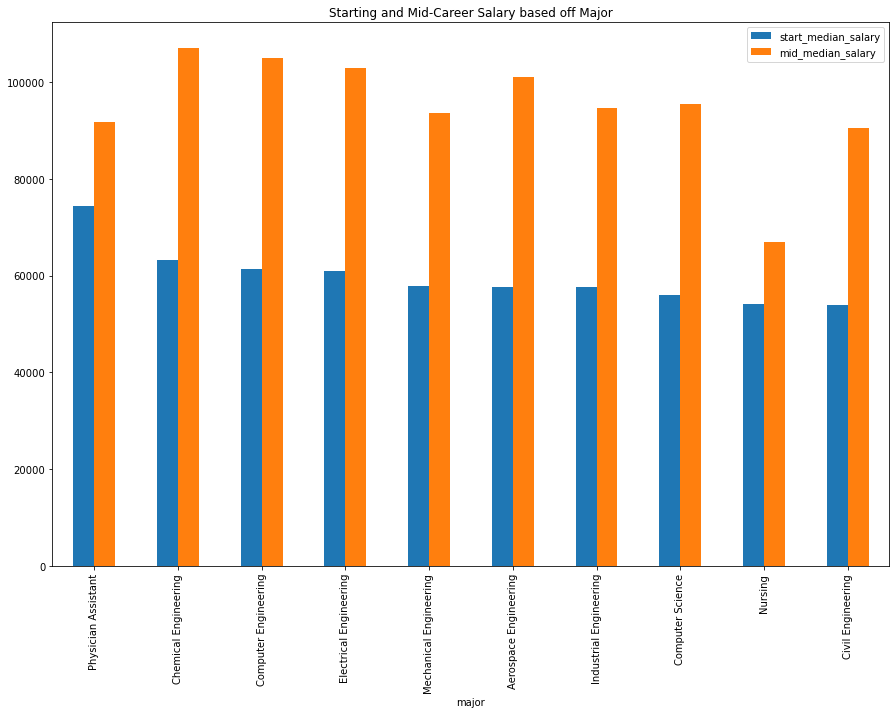

In [12]:
#graphing top 10 majors with their starting salary and mid way through their career
top_10_majors.plot(x='major',
                   y=['start_median_salary', 'mid_median_salary'],
                   kind="bar",
                   figsize=(15, 10),
                   title='Starting and Mid-Career Salary based off Major')

Here we have broken down the top 10 majors based of their starting salary and approx. in the middle of their career. We can see that a Physical Assistant has the over highest starting salary but Chemical Engineering has a higher mid-career salary. 

In [13]:
#grouping information based region and school_type
schoolT_perRegion = school_data.groupby(['region',
                                         'school_type']).size().to_frame()

#renaming column
schoolT_perRegion.columns = ['Number of Schools']

schoolT_perRegion

Number of Schools
region       school_type                    
California   Engineering                   2
             Liberal Arts                  3
             Party                         1
             State                        21
Midwestern   Engineering                   2
             Liberal Arts                  8
             Party                         4
             State                        50
Northeastern Engineering                   9
             Ivy League                    8
             Liberal Arts                 25
             Party                         3
             State                        25
Southern     Engineering                   3
             Liberal Arts                  4
             Party                        11
             State                        50
Western      Engineering                   2
             Liberal Arts                  7
             Party                         1
             State                        29

Text(0.5, 1.0, 'Number of Schools in each Region by School Type')

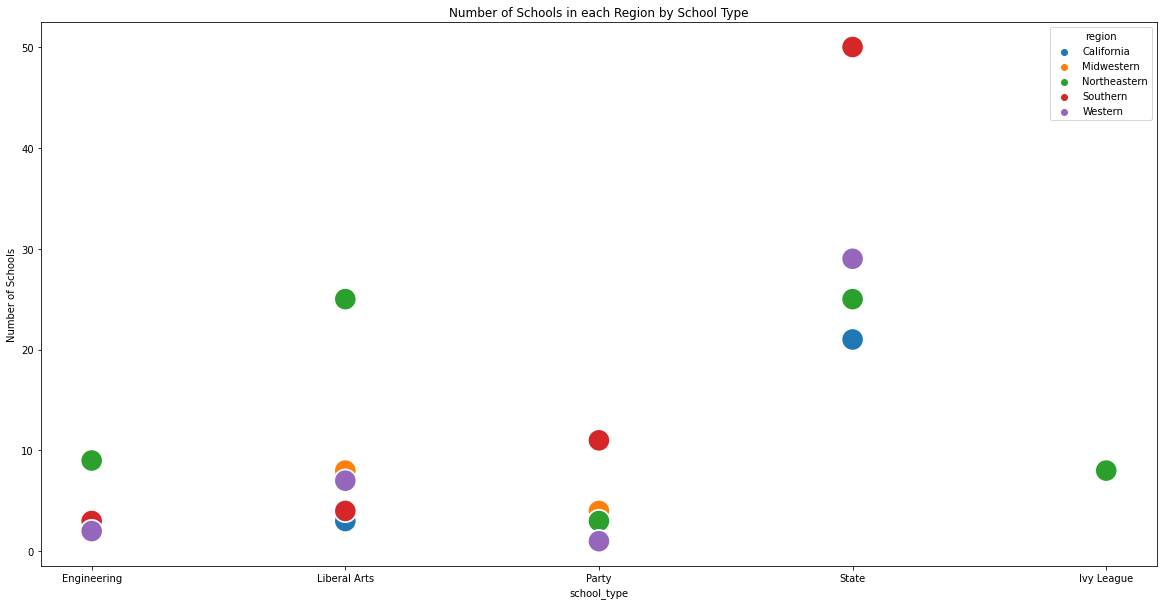

In [14]:
#using scatterplot to graph number of schools based of region and school_type
plt.figure(figsize=(20, 10))
sns.scatterplot(data=schoolT_perRegion,
                x='school_type',
                y='Number of Schools',
                hue='region',
                s=500).set_title('Number of Schools in each Region by School Type')

Looking at this scatterplot we get a look at where are schools are located based on region in the United States. We can see that Ivy League school are all located in the Northeastern Region while most of the State schools are located in the Southern Region. Lets break this down further by looking at this from a salary stand point.

In [15]:
#grouping average start_median_salary based on school_type
schoolType_start_salary = school_data.groupby('school_type').mean(
    'start_median_salary').sort_values('start_median_salary', ascending=False).round(2)

#dropping unnecessary columns
schoolType_start_salary = schoolType_start_salary.drop(columns=[
    'mid_median_salary', 'mid_per_10', 'mid_per_25', 'mid_per_75', 'mid_per_90'
])

#renaming column
schoolType_start_salary.columns = ['Starting Salary']

schoolType_start_salary

,Starting Salary
school_type,
Ivy League,60475.00
Engineering,59411.11
Liberal Arts,45746.81
Party,45715.00
State,44126.29


In [16]:
#count the school_types 
school_type_count = school_data.groupby('school_type').size().sort_values(ascending=False).to_frame()
school_type_count.columns = ['Number_of_schools']
school_type_count

,Number_of_schools
school_type,
State,175
Liberal Arts,47
Party,20
Engineering,18
Ivy League,8


Text(0.5, 1.0, 'Average starting Salary by School Type')

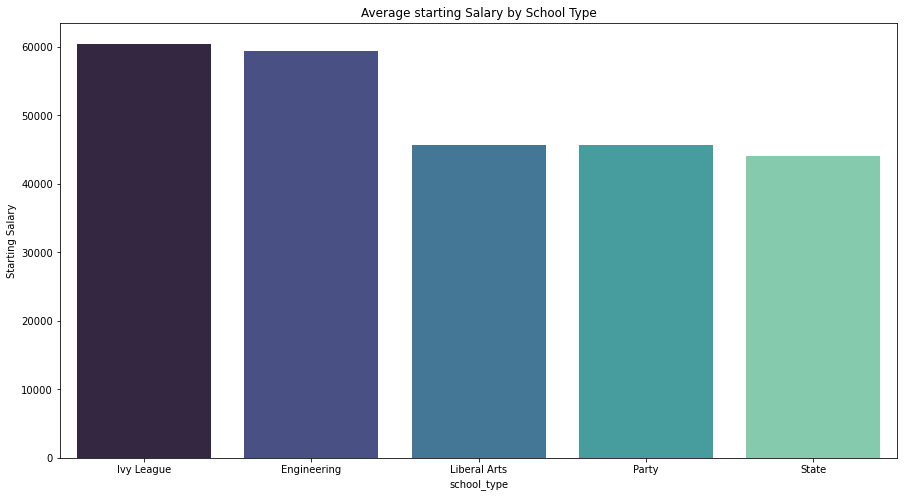

In [17]:
#plotting starting salary based off school_type
plt.figure(figsize=(15, 8))
sns.barplot(data=schoolType_start_salary,
            y='Starting Salary',
            x=schoolType_start_salary.index,
            palette='mako').set_title('Average starting Salary by School Type')

Here we can see that even though there is a very large amount of State schools all throughout the United States its average salary is overall the lowest out of all the school types at 44304.14 dollars. Looking at Ivy League schools we can see that it is the highest average starting salary even though it has a lower amount of schools at 60475.00 dollars. 

## Regression Modeling

Now we are going to use a regression analysis to test where the our dependent variable, ‘start_median_salary’ successfully answers out question as to whether Ivy League schools have the highest starting median salary. 

In [18]:
# Dropping all NaN values from the data set
school_data1 = school_data.dropna(inplace=True)

In [19]:
#column we are using to make our prediction
dependent_vars = school_data['start_median_salary']

#create dummies variavbles for the column school_type as they are not a numeric value
location_encoded = pd.get_dummies(school_data['school_type'])

#Attaching it to a new dataframe
school_data1 = pd.concat([school_data, location_encoded], axis=1)

#dropping columns not needed for regression analysis
school_data1 = school_data1.drop(
    columns=['region', 'start_median_salary', 'school', 'school_type'])

#Confirming dataframe
school_data1

,mid_median_salary,mid_per_10,mid_per_25,mid_per_75,mid_per_90,Engineering,Ivy League,Liberal Arts,Party,State
3,112000.0,59500.0,81000.0,149000.0,201000.0,0,0,0,0,1
5,101000.0,55000.0,74700.0,133000.0,178000.0,0,0,0,0,1
6,101000.0,51300.0,72500.0,139000.0,193000.0,0,0,0,0,1
7,101000.0,51700.0,75400.0,131000.0,177000.0,0,0,0,0,1
10,99600.0,52000.0,71600.0,135000.0,202000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
332,72600.0,43300.0,56100.0,99600.0,151000.0,0,0,0,0,1
334,72100.0,41700.0,55600.0,99300.0,141000.0,0,0,0,0,1
335,70300.0,35100.0,51200.0,100000.0,179000.0,0,0,0,0,1
337,66200.0,32800.0,44200.0,93300.0,181000.0,0,0,0,0,1


In [20]:
#Creating OLS regression model
lin_reg = sm.OLS(dependent_vars, school_data1)
reg_results = lin_reg.fit()
print(reg_results.summary())

                             OLS Regression Results                            
Dep. Variable:     start_median_salary   R-squared:                       0.903
Model:                             OLS   Adj. R-squared:                  0.899
Method:                  Least Squares   F-statistic:                     221.7
Date:                 Wed, 08 Dec 2021   Prob (F-statistic):          2.74e-103
Time:                         20:04:12   Log-Likelihood:                -2007.7
No. Observations:                  224   AIC:                             4035.
Df Residuals:                      214   BIC:                             4070.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
mid_median_salary     0.2756

Taking a look at the OLS regression model as a value of 0.903 which is very strong as it is close to the value of 1. Using the standard of 0.05 as our level of significance, looking at the coefficient for all the variables and the hypothesis ( P>|t| ) , we can see that there are two variables (mid_per_10 and mid_per_75) that are above our level of significance. Next we will be dropping the insignificant columns and recreate our OLS model. 

In [21]:
#dropping Insignificant columns and saving it to a new data frame
school_data2 = school_data1.drop(columns=['mid_per_10', 'mid_per_75'])

#Creating a new OLS regression model
lin_reg = sm.OLS(dependent_vars, school_data2)
reg_results = lin_reg.fit()
print(reg_results.summary())

                             OLS Regression Results                            
Dep. Variable:     start_median_salary   R-squared:                       0.902
Model:                             OLS   Adj. R-squared:                  0.899
Method:                  Least Squares   F-statistic:                     283.7
Date:                 Wed, 08 Dec 2021   Prob (F-statistic):          3.75e-105
Time:                         20:04:12   Log-Likelihood:                -2009.2
No. Observations:                  224   AIC:                             4034.
Df Residuals:                      216   BIC:                             4062.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
mid_median_salary     0.2818

Looking at our new OLS model we can see that our R-square value is still good at 0.902 as well as each variables level of significance is lower then 0.5. These variables are good for further predictions. 

In [22]:
y = school_data['start_median_salary']
X = school_data2

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [25]:
#Grabbing only school_types to show in Coeff plot
data_x = np.concatenate((lr.coef_[:0], lr.coef_[3:]))
plotindex = np.concatenate((X.columns[:0], X.columns[3:]))

<AxesSubplot:>

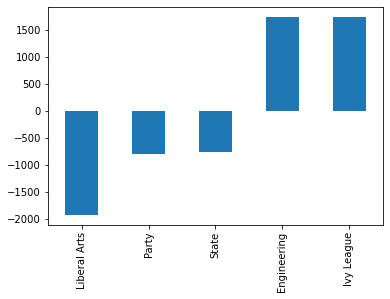

In [26]:
coeff = pd.Series(data=data_x, index=plotindex).sort_values()
coeff.plot(kind='bar')

Looking at this graph we can see that Ivy League and Engineering have a more postive correlation based on our dependent variables

In [27]:
# calculating MSE
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred), 2))

# calculating R-Square
print('R-Square:', np.round(mt.r2_score(y_test, y_pred), 2))

MSE: 3209100.53
R-Square: 0.89


Looking at our MSE value, it is very high value due to the salaries being very high, but if we square root 3209100.53 we get a value you of 1791.40. The square root value shows that with all the salaries there is an error range of 1791.40, which is really strong considering the values of our salary is 40,000 and higher. The R-square values is really strong at 0.89 being really close to 1. 

In regards to the individual coefficients, both Ivy League schools and Engineering have a positive correlation with our dependant variable ‘start_median_salary’ which supports my overall claim of Ivy League schools have a higher starting salary. 

# Conclusion

With a complete analysis exploring the data sets of College Salaries in the United States, I can confidently say that my hypothesis of ‘Attending an Ivy League school automatically gives you a higher starting salary’ hold true. We saw this with the different graphs plotted exploring the data as well as using regression analysis modelling. 

To explore a more interactive dashboard of the data here is a link to Tableau Public: https://public.tableau.com/views/College_Analysis/CollegeSalaryAnalysisDashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link